# Data Exploration

We will explore the 6 files of the lastfm data set to further understand the data within and to investigate relationships between the users, artists and tags before we proceed with our recommender system.

## Install dependencies

In [1]:
from __future__ import print_function
import seaborn as sns
import numpy as np
import pandas as pd
import collections
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
from matplotlib import pyplot as plt
import sklearn
import sklearn.manifold
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

## Import data

Import data from our 6 separate files and do some preliminary analysis to better understand what information is contianed in this dataset.

We have 6 files:
- artists
- tags
- user_artists
- user_friends
- user_taggedartists-timestamp
- user_taggedartists


### Artists

In [2]:
# Load artists
artists_cols = ['id', 'name', 'url', 'pictureURL']
artists = pd.read_csv('../Data/artists.dat', sep='	', names=artists_cols, skiprows=1)
artists.head(5)

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [3]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17632 entries, 0 to 17631
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          17632 non-null  int64 
 1   name        17632 non-null  object
 2   url         17632 non-null  object
 3   pictureURL  17188 non-null  object
dtypes: int64(1), object(3)
memory usage: 551.1+ KB


The picture URL contains some null values but we will not need this column for our analysis and so we can drop this column and the url column.

In [4]:
artists.drop('pictureURL', axis=1, inplace=True)
artists.drop('url', axis=1, inplace=True)

In [5]:
artists.head()

,id,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte


This dataframe contains one row for each of the 17,632 artist in this data set with their corresponding id

### Tags

In [6]:
# Load tags
tags_cols = ['tagID', 'tagValue']
tags = pd.read_csv('../Data/tags.dat', sep='	', encoding='latin-1')
tags.head()


,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal


In [7]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11946 entries, 0 to 11945
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tagID     11946 non-null  int64 
 1   tagValue  11946 non-null  object
dtypes: int64(1), object(1)
memory usage: 186.8+ KB


In [8]:
tags.describe()

,tagID
count,11946.000000
mean,6242.315336
std,3667.498057
min,1.000000
25%,3036.250000
50%,6210.500000
75%,9460.750000
max,12648.000000


In [9]:
tags1 = tags[tags['tagValue'].str.endswith('metal')]
tags1.value_counts()

tagID  tagValue             
1      metal                    1
5999   french death metal       1
6318   canadian metal           1
6317   italian metal            1
6311   us metal                 1
                               ..
3135   melodic heavy metal      1
3133   extreme power metal      1
2956   communism death metal    1
2914   transmetal               1
12634  angry metal              1
Length: 306, dtype: int64

This dataframe contains one row for each of the 11,946 seperate tags that can be applied to each artist. As we can see from above there can be a wide variety of different genres. There are 306 different tags that all contain the word metal. We will need to be minfuk of this when doing analysis.

### User Artists

In [10]:
# Load user-artists
user_artists_cols = ['userID', 'artistID', 'weight']
user_artists = pd.read_csv('../Data/user_artists.dat', sep='	')
user_artists.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [11]:
user_artists.describe()

,userID,artistID,weight
count,92834.000000,92834.000000,92834.00000
mean,1037.010481,3331.123145,745.24393
std,610.870436,4383.590502,3751.32208
min,2.000000,1.000000,1.00000
25%,502.000000,436.000000,107.00000
50%,1029.000000,1246.000000,260.00000
75%,1568.000000,4350.000000,614.00000
max,2100.000000,18745.000000,352698.00000


In [12]:
user_artists.value_counts()

userID  artistID  weight
2       51        13883     1
1390    964       147       1
        863       687       1
        859       196       1
        709       201       1
                           ..
676     859       168       1
        856       127       1
        854       283       1
        841       198       1
2100    18730     263       1
Length: 92834, dtype: int64

The user artists contains users, the artist they listen to, and the weight which is proportional to how much they have listened to the artist. The weight value goes from 1-352,698 with an average weight of 745. Users may have a weighting for multiple artists.

(README.txt)
92834 user-listened artist relations:
         avg. 49.067 artists most listened by each user
         avg. 5.265 users who listened each artist

### User Friends

In [13]:
# Load user-friends
user_friends_cols = ['userID', 'friendID']
user_friends = pd.read_csv('../Data/user_friends.dat', sep='	')
user_friends.head()

,userID,friendID
0,2,275
1,2,428
2,2,515
3,2,761
4,2,831


In [14]:
user_friends.describe()

,userID,friendID
count,25434.000000,25434.000000
mean,992.161437,992.161437
std,603.959049,603.959049
min,2.000000,2.000000
25%,441.000000,441.000000
50%,984.000000,984.000000
75%,1514.000000,1514.000000
max,2100.000000,2100.000000


This dataframe contains: 12717 bi-directional user friend relations, i.e. 25434 (user_i, user_j) pairs
         avg. 13.443 friend relations per user (taken from README.txt with the data)
         
We will explore this data to see if any clear patterns emerge and to see what the distribution of friendship is like in this data.

In [15]:
top_friends = user_friends[['userID', 'friendID']].groupby('userID').count().reset_index()
top_friends.rename({'friendID':'count'}, axis=1, inplace=True)

top_friends = top_friends.sort_values('count', ascending=False)
top_friends

,userID,count
1394,1543,119
1164,1281,110
772,831,106
169,179,97
1359,1503,95
...,...,...
1693,1874,1
535,573,1
1214,1340,1
145,151,1


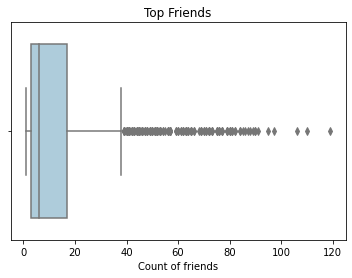

In [16]:
r = sns.color_palette('Paired')
sns.boxplot(x=top_friends['count'], palette=r)

plt.title('Top Friends')
plt.xlabel('Count of friends')
plt.show()

This boxplot gives us an idea of the relationships between friends. The majority of the users have < 20 friends however there appear to be some outliers who have upwards of 40 and as many as 119 friends. These are very influential users within this dataset

### User Tagged Artists Timestamp

In [17]:
# Load user-tagged-artists-timestamps
user_tagged_artists_tstamp_cols = ['userID', 'artistID', 'tagID', 'timestamp']
user_tagged_artists_tstamp = pd.read_csv('../Data/user_taggedartists-timestamps.dat', sep='	')
user_tagged_artists_tstamp.head()

,userID,artistID,tagID,timestamp
0,2,52,13,1238536800000
1,2,52,15,1238536800000
2,2,52,18,1238536800000
3,2,52,21,1238536800000
4,2,52,41,1238536800000


In [18]:
user_tagged_artists_tstamp.describe()

,userID,artistID,tagID,timestamp
count,186479.000000,186479.000000,186479.000000,1.864790e+05
mean,1035.600137,4375.845328,1439.582913,1.239204e+12
std,622.461272,4897.789595,2775.340279,4.299091e+10
min,2.000000,1.000000,1.000000,-4.287204e+11
25%,488.000000,686.000000,79.000000,1.209593e+12
50%,1021.000000,2203.000000,195.000000,1.243807e+12
75%,1624.000000,6714.000000,887.000000,1.275343e+12
max,2100.000000,18744.000000,12647.000000,1.304941e+12


### User Tagged Artists

In [19]:
# Load user-tagged-artists
user_tagged_artists_cols = ['userID', 'artistID', 'tagID', 'day', 'month', 'year']
user_tagged_artists = pd.read_csv('../Data/user_taggedartists.dat', sep='	')
user_tagged_artists.head()

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009


In [20]:
user_tagged_artists.describe()

,userID,artistID,tagID,day,month,year
count,186479.000000,186479.000000,186479.000000,186479.000000,186479.000000,186479.000000
mean,1035.600137,4375.845328,1439.582913,1.095566,6.524215,2008.809791
std,622.461272,4897.789595,2775.340279,0.712813,3.486855,1.410062
min,2.000000,1.000000,1.000000,1.000000,1.000000,1956.000000
25%,488.000000,686.000000,79.000000,1.000000,3.000000,2008.000000
50%,1021.000000,2203.000000,195.000000,1.000000,7.000000,2009.000000
75%,1624.000000,6714.000000,887.000000,1.000000,10.000000,2010.000000
max,2100.000000,18744.000000,12647.000000,9.000000,12.000000,2011.000000


The users tagged artist and users tagged artists timestamp are the same data across userID, artistID and tagID columns.

## Data Manipulation and Visualisation

We will bring all of our data together and create some visualisations to better understand the data.


In [21]:
artists.tail()

,id,name
17627,18741,Diamanda Galás
17628,18742,Aya RL
17629,18743,Coptic Rain
17630,18744,Oz Alchemist
17631,18745,Grzegorz Tomczak


It is noted the index and the id don't add up at the end of the dataframe so we need to be aware of this when we come to the recommender system.

In [22]:
user_artists.tail()

,userID,artistID,weight
92829,2100,18726,337
92830,2100,18727,297
92831,2100,18728,281
92832,2100,18729,280
92833,2100,18730,263


In [23]:
tags.tail()

,tagID,tagValue
11941,12644,suomi
11942,12645,symbiosis
11943,12646,sverige
11944,12647,eire
11945,12648,electro latino


In [24]:
user_tagged_artists.tail()

,userID,artistID,tagID,day,month,year
186474,2100,16437,4,1,7,2010
186475,2100,16437,292,1,5,2010
186476,2100,16437,2087,1,7,2010
186477,2100,16437,2801,1,5,2010
186478,2100,16437,3335,1,7,2010


In [25]:
user_friends.tail()

,userID,friendID
25429,2099,1801
25430,2099,2006
25431,2099,2016
25432,2100,586
25433,2100,607


# Merge Data / Visualisations


In [26]:
merged_uta_t = pd.merge(user_tagged_artists, tags, on = 'tagID')

In [27]:
merged_uta_t.head()

,userID,artistID,tagID,day,month,year,tagValue
0,2,52,13,1,4,2009,chillout
1,2,63,13,1,4,2009,chillout
2,2,73,13,1,4,2009,chillout
3,2,94,13,1,4,2009,chillout
4,2,6177,13,1,5,2009,chillout


We want to create a calculated field counting how many of each unique tag have been applied. This will show us the most listened to genres. 

In [28]:
top_tag = merged_uta_t[['userID', 'tagValue']].groupby('tagValue').count().reset_index()
top_tag.rename({'userID':'count'}, axis=1, inplace=True)

#limit top tags to top 10
top_tag = top_tag.sort_values('count', ascending=False).head(10)
top_tag

,tagValue,count
7473,rock,7503
6802,pop,5418
441,alternative,5251
2709,electronic,4672
4393,indie,4458
3099,female vocalists,4228
174,80s,2791
2120,dance,2739
457,alternative rock,2631
1834,classic rock,2287


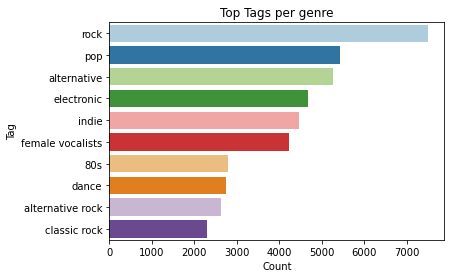

In [29]:
#Display top ten tags
r = sns.color_palette('Paired')
ax = sns.barplot(x='count', y='tagValue', data=top_tag,
            label="tagValue", palette=r)

plt.title('Top Tags per genre')
plt.ylabel('Tag')
plt.xlabel('Count')
plt.show()

We can see rock is the dominant genre. Rock is the number one choice, but as we alluded to earlier, there is also alternative rock and classic rock as the 9th and 10th most popular choices.

In [30]:
merged_ua_a = pd.merge(user_artists, artists, how='left', left_on='artistID', right_on='id')
merged_ua_a.head()

,userID,artistID,weight,id,name
0,2,51,13883,51,Duran Duran
1,2,52,11690,52,Morcheeba
2,2,53,11351,53,Air
3,2,54,10300,54,Hooverphonic
4,2,55,8983,55,Kylie Minogue


We now look at the different weights given to each of the artists indicating how much each artist has been listened to by users.

In [31]:
top_artist = merged_ua_a[['weight', 'name']].groupby('name').sum().reset_index()

top_artist

,name,weight
0,!!!,2826
1,!DISTAIN,1257
2,!deladap,65
3,#####,3707
4,#2 Orchestra,144
...,...,...
17627,ＲＥＤ,373
17628,ＶａｎｅｓｓＡ,2172
17629,ｂｏｏｇｉｅｍａｎ,378
17630,ｂｏｒｎ,2287


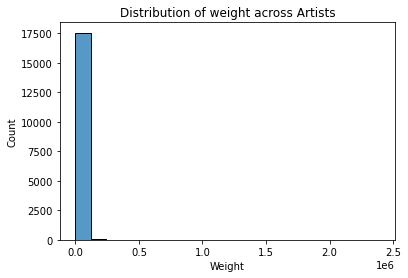

In [32]:
#Display distribution of artists cumulative weights
sns.histplot(x='weight', data=top_artist, palette=r, bins=20)
plt.title('Distribution of weight across Artists')
plt.ylabel('Count')
plt.xlabel('Weight')
plt.show()

In [33]:
top_artist.describe()

,weight
count,1.763200e+04
mean,3.923774e+03
std,3.409934e+04
min,1.000000e+00
25%,1.130000e+02
50%,3.500000e+02
75%,1.234250e+03
max,2.393140e+06


This data is extremely right skewed with some large outliers (max value of 2,393,140) which is making it difficult to visualise the distribution. We will use log scale to enable us to do so.

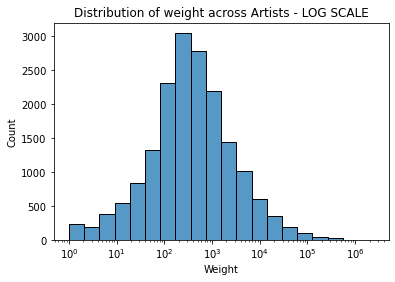

In [34]:
#Display artists weights- log
sns.histplot(x='weight', data=top_artist, palette=r, log_scale=True, bins=20)
plt.title('Distribution of weight across Artists - LOG SCALE')
plt.ylabel('Count')
plt.xlabel('Weight')
plt.show()

There appears to be a normal distribution around the log scale of weights assigned to each artist.

## Conclusion 

We have completed our preliminary analysis of the data provided. We understand the weights value varies greatly across the data set. We also have an indication that there are a large number of highly linked users and friends across the data. We are hopeful that with all of this data we will be able to create a useful music recommender system.